In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics 
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv(r"Book.csv")
print(data.columns)

Index(['Year', 'Years', 'Unit Consumption in MU',
       '% increase w.r.t. the previous year', 'Peak Demand in MW',
       '% inrease the prevoius year'],
      dtype='object')


In [4]:
data = data.rename(columns={"Unit Consumption in MU": "UnitConInMU",
                   "% increase w.r.t. the previous year": "PerIncWRTTPY",
                   "Peak Demand in MW": "PDinMW","% inrease the prevoius year":"PIncITPreYr"})
print(data.columns)

Index(['Year', 'Years', 'UnitConInMU', 'PerIncWRTTPY', 'PDinMW',
       'PIncITPreYr'],
      dtype='object')


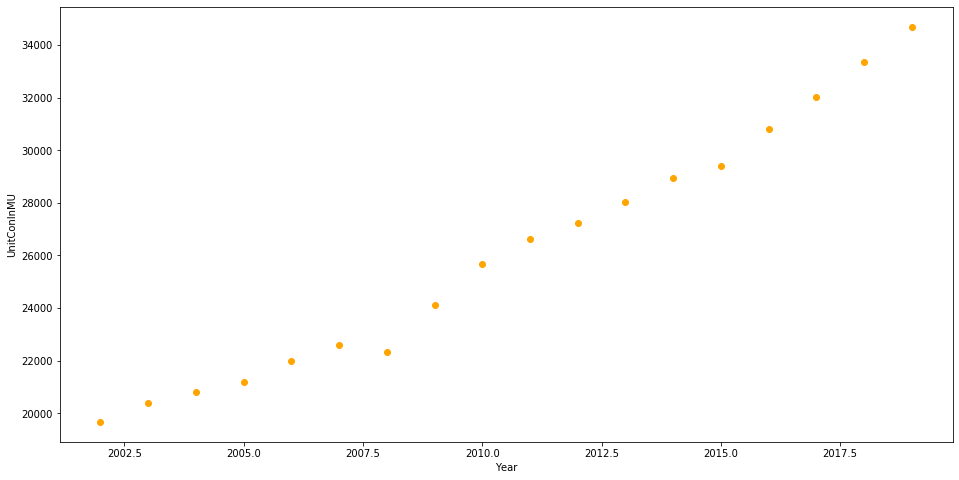

In [5]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Year'],
    data['UnitConInMU'],
    c='orange'
)
plt.ylabel("UnitConInMU")
plt.xlabel("Year")
plt.show()

In [6]:
X = data["Year"].values.reshape(-1,1)

In [7]:
#Y = data.iloc[:, ['UnitConInMU','PDinMW']]
Y = data.iloc[:, [2,4]]

In [8]:
print(Y)

    UnitConInMU  PDinMW
0     19666.640    3097
1     20384.980    3289
2     20810.281    3490
3     21184.427    3626
4     21977.311    3736
5     22580.893    4030
6     22313.054    4034
7     24124.309    4408
8     25667.919    4720
9     26617.490    5028
10    27234.865    5642
11    28029.747    5653
12    28963.782    5925
13    29415.865    5846
14    30790.906    6261
15    32009.092    6526
16    33370.630    6934
17    34700.115    7409


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=4)

In [10]:
max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
max_depth=max_depth,
random_state=0))
regr_multirf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     criterion='mse',
                                                     max_depth=30,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     oob_score=False,
                                                   

In [11]:
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
random_state=2)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [12]:
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

/home/wasim/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


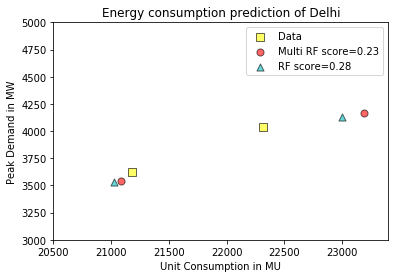

In [13]:
plt.figure()
s = 50
a = 0.6

plt.scatter(y_test.iloc[:, 0].values, y_test.iloc[:, 1].values, edgecolor='k',
c="yellow", s=s, marker="s", alpha=a, label="Data")

plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
c="red", s=s, alpha=a,
label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))

plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
c="c", s=s, marker="^", alpha=a,
label="RF score=%.2f" % regr_rf.score(X_test, y_test))

plt.xlim([20500, 23400])
plt.ylim([3000, 5000])
plt.xlabel("Unit Consumption in MU")
plt.ylabel("Peak Demand in MW")
plt.title("Energy consumption prediction of Delhi")
plt.legend()
plt.show()

In [14]:
print("X_Test\n", X_test)
print("Y_test\n", y_test)
print("Y_ref\n", y_rf)  
print("Y_multirf\n", y_multirf)

X_Test
 [[2008]
 [2005]]
Y_test
    UnitConInMU  PDinMW
6    22313.054    4034
3    21184.427    3626
Y_ref
 [[23002.27284  4127.42   ]
 [21025.98757  3531.01   ]]
Y_multirf
 [[23193.01793  4170.72   ]
 [21082.33665  3539.29   ]]
